# Import and Clean Data

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd
import numpy as np
import os

In [2]:
file_dir='C://Users/Ian/Desktop/Misc_Projects/Sales_Tax_Analysis/Sales_Tax_Collections_by_State.csv'

df = pd.read_csv(file_dir)

pd.options.display.float_format = '{:.2f}'.format

df.head()

,state,month,year,tax type,value,fips state,numeric month,note,id
0,Florida,July,2019,motor fuel,241299325.00,12,7,NaN,12_2019_7
1,Alabama,October,2022,motor fuel,80850005.00,1,10,NaN,1_2022_10
2,Alaska,October,2022,motor fuel,NaN,2,10,NaN,2_2022_10
3,Arizona,October,2022,motor fuel,67962955.00,4,10,NaN,4_2022_10
4,Arkansas,October,2022,motor fuel,47025345.00,5,10,NaN,5_2022_10


In [3]:
df['note'].describe()

count   0.00
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: note, dtype: float64

In [4]:
df['tax type'].describe()

count           2193
unique             1
top       motor fuel
freq            2193
Name: tax type, dtype: object

In [5]:
# Drop the redundant "note" column which is blank throughout the entire dataset
# Drop the redundant "tax type" column since every tax is based on motor fuel
df_v1 = df.drop(['note','tax type'], axis=1)

In [6]:
# Drop rows with null values in the 'value' column
df_v2 = df_v1[df_v1['value'].notna()]
df_v2.head()

,state,month,year,value,fips state,numeric month,id
0,Florida,July,2019,241299325.00,12,7,12_2019_7
1,Alabama,October,2022,80850005.00,1,10,1_2022_10
3,Arizona,October,2022,67962955.00,4,10,4_2022_10
4,Arkansas,October,2022,47025345.00,5,10,5_2022_10
5,California,October,2022,759581000.00,6,10,6_2022_10


In [7]:
# Create a national df once data has been cleaned
nat_df = df_v2

nat_df.head()

,state,month,year,value,fips state,numeric month,id
0,Florida,July,2019,241299325.00,12,7,12_2019_7
1,Alabama,October,2022,80850005.00,1,10,1_2022_10
3,Arizona,October,2022,67962955.00,4,10,4_2022_10
4,Arkansas,October,2022,47025345.00,5,10,5_2022_10
5,California,October,2022,759581000.00,6,10,6_2022_10


# Exploratory Analysis

### Identify how Ohio compares to the national averages

In [8]:
# Acquire averages on a national level
nat_mean = nat_df['value'].mean()
nat_med = nat_df['value'].median()

print(f'National Mean: ${nat_mean:,.2f}')
print(f'National Median: ${nat_med:,.2f}')

National Mean: $96,118,634.59
National Median: $61,096,398.00


In [9]:
ohio_df = nat_df.loc[nat_df['state']=='Ohio']

ohio_df.head()

,state,month,year,value,fips state,numeric month,id
1346,Ohio,April,2019,158966637.00,39,4,39_2019_4
1347,Ohio,April,2020,155490571.00,39,4,39_2020_4
1348,Ohio,April,2021,220850767.00,39,4,39_2021_4
1349,Ohio,April,2022,215434820.00,39,4,39_2022_4
1350,Ohio,August,2019,244895720.00,39,8,39_2019_8


In [10]:
oh_mean = ohio_df['value'].mean()
oh_med = ohio_df['value'].median()

oh_mean_diff = oh_mean-nat_mean

print(f'Ohio Mean: ${oh_mean:,.2f}')
print(f'Ohio Median: ${oh_med:,.2f}')

print(f'\nOhio had ${oh_mean_diff:,.2f} compared to the national average.')

Ohio Mean: $212,794,264.88
Ohio Median: $219,103,371.00

Ohio had $116,675,630.29 compared to the national average.


### Identify if Ohio has any particular months which generate more revenue on average

In [11]:
ohio_df.head()

,state,month,year,value,fips state,numeric month,id
1346,Ohio,April,2019,158966637.00,39,4,39_2019_4
1347,Ohio,April,2020,155490571.00,39,4,39_2020_4
1348,Ohio,April,2021,220850767.00,39,4,39_2021_4
1349,Ohio,April,2022,215434820.00,39,4,39_2022_4
1350,Ohio,August,2019,244895720.00,39,8,39_2019_8


In [12]:
# Group the dataframe by month (currently alphabetical, not chronological)
oh_months = ohio_df.groupby(by='month',sort='numeric month')

oh_months.describe()

year                                                      value  \
          count    mean  std     min     25%     50%     75%     max count   
month                                                                        
April      4.00 2020.50 1.29 2019.00 2019.75 2020.50 2021.25 2022.00  4.00   
August     4.00 2020.50 1.29 2019.00 2019.75 2020.50 2021.25 2022.00  4.00   
December   3.00 2020.00 1.00 2019.00 2019.50 2020.00 2020.50 2021.00  3.00   
February   3.00 2021.00 1.00 2020.00 2020.50 2021.00 2021.50 2022.00  3.00   
January    3.00 2021.00 1.00 2020.00 2020.50 2021.00 2021.50 2022.00  3.00   
July       4.00 2020.50 1.29 2019.00 2019.75 2020.50 2021.25 2022.00  4.00   
June       4.00 2020.50 1.29 2019.00 2019.75 2020.50 2021.25 2022.00  4.00   
March      3.00 2021.00 1.00 2020.00 2020.50 2021.00 2021.50 2022.00  3.00   
May        4.00 2020.50 1.29 2019.00 2019.75 2020.50 2021.25 2022.00  4.00   
November   3.00 2020.00 1.00 2019.00 2019.50 2020.00 2020.50 2021.00  3.00   
October    3.00 2020.00 1.00 2019.00 2019.50 2020.00 2020.50 2021.00  3.00   
September  4.00 2020.50 1.29 2019.00 2019.75 2020.50 2021.25 2022.00  4.00   

                        ... fips state       numeric month                   \
                  mean  ...        75%   max         count  mean  std   min   
month                   ...                                                   
April     187685698.75  ...      39.00 39.00          4.00  4.00 0.00  4.00   
August    233616698.00  ...      39.00 39.00          4.00  8.00 0.00  8.00   
December  213679647.67  ...      39.00 39.00          3.00 12.00 0.00 12.00   
February  195337738.00  ...      39.00 39.00          3.00  2.00 0.00  2.00   
January   204649463.33  ...      39.00 39.00          3.00  1.00 0.00  1.00   
July      228462911.50  ...      39.00 39.00          4.00  7.00 0.00  7.00   
June      206898478.25  ...      39.00 39.00          4.00  6.00 0.00  6.00   
March     213785765.00  ...      39.00 39.00          3.00  3.00 0.00  3.00   
May       203715848.25  ...      39.00 39.00          4.00  5.00 0.00  5.00   
November  214065533.00  ...      39.00 39.00          3.00 11.00 0.00 11.00   
October   229421898.33  ...      39.00 39.00          3.00 10.00 0.00 10.00   
September 220755112.50  ...      39.00 39.00          4.00  9.00 0.00  9.00   

                                   
            25%   50%   75%   max  
month                              
April      4.00  4.00  4.00  4.00  
August     8.00  8.00  8.00  8.00  
December  12.00 12.00 12.00 12.00  
February   2.00  2.00  2.00  2.00  
January    1.00  1.00  1.00  1.00  
July       7.00  7.00  7.00  7.00  
June       6.00  6.00  6.00  6.00  
March      3.00  3.00  3.00  3.00  
May        5.00  5.00  5.00  5.00  
November  11.00 11.00 11.00 11.00  
October   10.00 10.00 10.00 10.00  
September  9.00  9.00  9.00  9.00  

[12 rows x 32 columns]

In [13]:
# Group the dataframe by month and find the mean value of each group
oh_month_avg = oh_months.mean()['value']
oh_month_avg.index

# Print findings for each individual month
for i in range(len(oh_month_avg)):
    current_month_avg=oh_month_avg[i]
    current_month_diff=current_month_avg-oh_mean
    print(f'The average value in {oh_month_avg.index[i]} was ${current_month_avg:,.0f}.')
    print(f"This is a difference of ${current_month_diff:,.0f} compared to Ohio's mean")
    print(f'\n')

The average value in April was $187,685,699.
This is a difference of $-25,108,566 compared to Ohio's mean


The average value in August was $233,616,698.
This is a difference of $20,822,433 compared to Ohio's mean


The average value in December was $213,679,648.
This is a difference of $885,383 compared to Ohio's mean


The average value in February was $195,337,738.
This is a difference of $-17,456,527 compared to Ohio's mean


The average value in January was $204,649,463.
This is a difference of $-8,144,802 compared to Ohio's mean


The average value in July was $228,462,912.
This is a difference of $15,668,647 compared to Ohio's mean


The average value in June was $206,898,478.
This is a difference of $-5,895,787 compared to Ohio's mean


The average value in March was $213,785,765.
This is a difference of $991,500 compared to Ohio's mean


The average value in May was $203,715,848.
This is a difference of $-9,078,417 compared to Ohio's mean


The average value in November was $2

In [14]:
# Group the dataframe by month (chronological)
oh_months = ohio_df.groupby(by='numeric month',sort='numeric month')

oh_months.describe()

year                                                       \
              count    mean  std     min     25%     50%     75%     max   
numeric month                                                              
1              3.00 2021.00 1.00 2020.00 2020.50 2021.00 2021.50 2022.00   
2              3.00 2021.00 1.00 2020.00 2020.50 2021.00 2021.50 2022.00   
3              3.00 2021.00 1.00 2020.00 2020.50 2021.00 2021.50 2022.00   
4              4.00 2020.50 1.29 2019.00 2019.75 2020.50 2021.25 2022.00   
5              4.00 2020.50 1.29 2019.00 2019.75 2020.50 2021.25 2022.00   
6              4.00 2020.50 1.29 2019.00 2019.75 2020.50 2021.25 2022.00   
7              4.00 2020.50 1.29 2019.00 2019.75 2020.50 2021.25 2022.00   
8              4.00 2020.50 1.29 2019.00 2019.75 2020.50 2021.25 2022.00   
9              4.00 2020.50 1.29 2019.00 2019.75 2020.50 2021.25 2022.00   
10             3.00 2020.00 1.00 2019.00 2019.50 2020.00 2020.50 2021.00   
11             3.00 2020.00 1.00 2019.00 2019.50 2020.00 2020.50 2021.00   
12             3.00 2020.00 1.00 2019.00 2019.50 2020.00 2020.50 2021.00   

              value               ...                           fips state  \
              count         mean  ...          75%          max      count   
numeric month                     ...                                        
1              3.00 204649463.33  ... 208676461.00 214989659.00       3.00   
2              3.00 195337738.00  ... 201119514.50 206463132.00       3.00   
3              3.00 213785765.00  ... 220560755.00 220888649.00       3.00   
4              4.00 187685698.75  ... 216788806.75 220850767.00       4.00   
5              4.00 203715848.25  ... 230865076.75 230880436.00       4.00   
6              4.00 206898478.25  ... 225058366.25 229171061.00       4.00   
7              4.00 228462911.50  ... 235098706.00 240259633.00       4.00   
8              4.00 233616698.00  ... 239655634.25 244895720.00       4.00   
9              4.00 220755112.50  ... 224328989.75 226591721.00       4.00   
10             3.00 229421898.33  ... 233234895.00 240831539.00       3.00   
11             3.00 214065533.00  ... 219873643.50 220795099.00       3.00   
12             3.00 213679647.67  ... 218739059.00 219254554.00       3.00   

                                                        
               mean  std   min   25%   50%   75%   max  
numeric month                                           
1             39.00 0.00 39.00 39.00 39.00 39.00 39.00  
2             39.00 0.00 39.00 39.00 39.00 39.00 39.00  
3             39.00 0.00 39.00 39.00 39.00 39.00 39.00  
4             39.00 0.00 39.00 39.00 39.00 39.00 39.00  
5             39.00 0.00 39.00 39.00 39.00 39.00 39.00  
6             39.00 0.00 39.00 39.00 39.00 39.00 39.00  
7             39.00 0.00 39.00 39.00 39.00 39.00 39.00  
8             39.00 0.00 39.00 39.00 39.00 39.00 39.00  
9             39.00 0.00 39.00 39.00 39.00 39.00 39.00  
10            39.00 0.00 39.00 39.00 39.00 39.00 39.00  
11            39.00 0.00 39.00 39.00 39.00 39.00 39.00  
12            39.00 0.00 39.00 39.00 39.00 39.00 39.00  

[12 rows x 24 columns]

In [15]:
# Group the dataframe by month and find the mean value of each group
oh_month_avg = oh_months.mean()['value']
oh_month_avg.index

# Create a dataframe using the information
for i in [1,12]:
    d = {'Months':['January','February','March','April','May','June','July','August','September','October','November','December'],
        'Average Tax Per Month':oh_month_avg,
        'Difference From Total Average': oh_month_avg - oh_mean}
    oh_avg_df = pd.DataFrame(data=d, index=[1,2,3,4,5,6,7,8,9,10,11,12])

In [16]:
oh_avg_df

,Months,Average Tax Per Month,Difference From Total Average
1,January,204649463.33,-8144801.55
2,February,195337738.00,-17456526.88
3,March,213785765.00,991500.12
4,April,187685698.75,-25108566.13
5,May,203715848.25,-9078416.63
6,June,206898478.25,-5895786.63
7,July,228462911.50,15668646.62
8,August,233616698.00,20822433.12
9,September,220755112.50,7960847.62
10,October,229421898.33,16627633.45


### Identify any sharp dips/rises in Ohio dataset

In [17]:
# Sort the Ohio data chronologically
ohio_df_chron = ohio_df.sort_values(['year','numeric month'])

# Reset index for ease of access in future for loop
ohio_df_chron.reset_index(inplace=True)

ohio_df_chron.tail()

,index,state,month,year,value,fips state,numeric month,id
37,1960,Ohio,May,2022,230880436.00,39,5,39_2022_5
38,2060,Ohio,June,2022,223687468.00,39,6,39_2022_6
39,2059,Ohio,July,2022,217328691.00,39,7,39_2022_7
40,2161,Ohio,August,2022,231650607.00,39,8,39_2022_8
41,2162,Ohio,September,2022,216906050.00,39,9,39_2022_9


In [18]:
# Drop redundant columns from filtering to specifically Ohio
ohio_df_chron.drop(labels=['index','state', 'fips state'], axis=1, inplace=True)

ohio_df_chron.head()

,month,year,value,numeric month,id
0,April,2019,158966637.00,4,39_2019_4
1,May,2019,170462947.00,5,39_2019_5
2,June,2019,163356424.00,6,39_2019_6
3,July,2019,240259633.00,7,39_2019_7
4,August,2019,244895720.00,8,39_2019_8


In [19]:
len(ohio_df_chron)

42

In [20]:
# Drop redundant state value (39) from 'id' column
ohio_df_chron['id'] = ohio_df_chron['id'].map(lambda x: x.lstrip('39_'))

ohio_df_chron.head()

,month,year,value,numeric month,id
0,April,2019,158966637.00,4,2019_4
1,May,2019,170462947.00,5,2019_5
2,June,2019,163356424.00,6,2019_6
3,July,2019,240259633.00,7,2019_7
4,August,2019,244895720.00,8,2019_8


In [21]:
# Initialize a series of 'differences' to eventually create new column in dataframe
# Initialize with '0' for first difference for null value in first month
differences = [0]

for i in range(1,42):
    current_val = ohio_df_chron['value'][i]
    prev_val = ohio_df_chron['value'][i-1]
    difference = current_val - prev_val
    differences.append(difference)
    
differences[:5]

[0, 11496310.0, -7106523.0, 76903209.0, 4636087.0]

In [22]:
# Create new column with these monthly differences
ohio_df_chron['monthly difference'] = differences

In [23]:
# Verify differences were appended correctly
ohio_df_chron.head()

,month,year,value,numeric month,id,monthly difference
0,April,2019,158966637.00,4,2019_4,0.00
1,May,2019,170462947.00,5,2019_5,11496310.00
2,June,2019,163356424.00,6,2019_6,-7106523.00
3,July,2019,240259633.00,7,2019_7,76903209.00
4,August,2019,244895720.00,8,2019_8,4636087.00


In [24]:
# Find index of 'January' values to add annual separators on line graph
oh_jan_df = ohio_df_chron.loc[ohio_df_chron['numeric month']==1]

oh_jan_df

,month,year,value,numeric month,id,monthly difference
9,January,2020,214989659.00,1,2020_1,-4264895.00
21,January,2021,196595468.00,1,2021_1,-6965357.00
33,January,2022,202363263.00,1,2022_1,-15860301.00


C:\Users\Ian\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:20: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


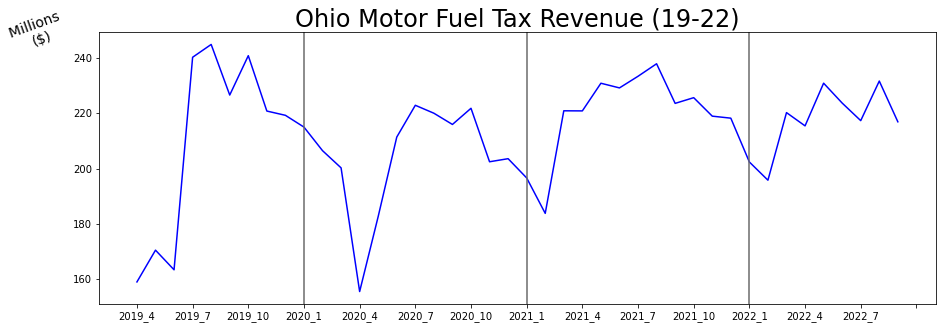

In [25]:
# Create a basic plot to visualize the month trends
fig,ax = plt.subplots(figsize=(15,5))

ax.plot(ohio_df_chron['id'],ohio_df_chron['value']/1000000, color='b')

ax.set_title('Ohio Motor Fuel Tax Revenue (19-22)', fontsize=24)
ax.set_xticks(np.arange(0,45,step=3), rotation=30, fontsize=12)
ax.set_yticks(ticks=np.arange(160,260,step=20),fontsize=12)
ax.set_ylabel('Millions \n($)', rotation=20, fontsize=14)
ax.yaxis.set_label_coords(-0.065,.95)

# # Create vert lines to show separate years
ax.axvline(x=9, color='dimgray')
ax.axvline(x=21, color='dimgray')
ax.axvline(x=33, color='dimgray')

# Can't save fig here or it will ruin all 50 states
# plt.savefig('Individual_State_Revenues/Ohio/Ohio_Revenue_Total')

fig.show()

C:\Users\Ian\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:20: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


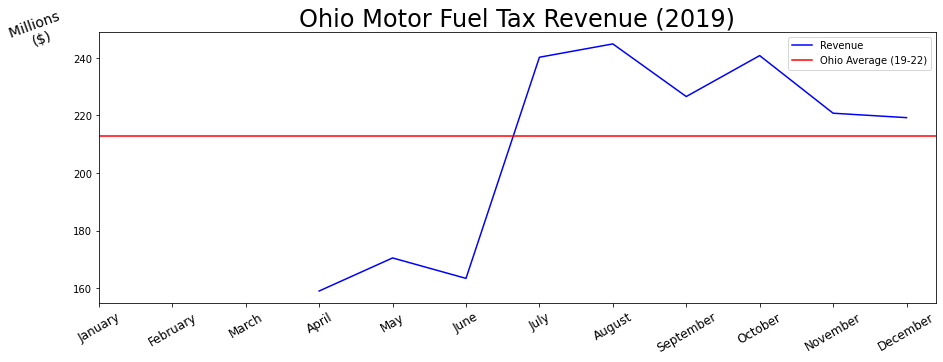

In [26]:
# Plot 19
fig,ax = plt.subplots(figsize=(15,5))

ax.plot(ohio_df_chron['id'].loc[ohio_df_chron['year']==2019],ohio_df_chron['value'].loc[ohio_df_chron['year']==2019]/1000000, color='b')

ax.set_title('Ohio Motor Fuel Tax Revenue (2019)', fontsize=24)
# Need to set labels using a different year, since 2019 is missing 3 months of data
ax.set_xticks(np.arange(-3,9,step=1), labels=ohio_df_chron['month'].loc[ohio_df_chron['year']==2020], rotation=30, fontsize=12)
ax.set_yticks(ticks=np.arange(160,260,step=20),fontsize=12)
ax.set_ylabel('Millions \n($)', rotation=20, fontsize=14)
ax.yaxis.set_label_coords(-0.065,.95)

# Set total oh_average line
ax.axhline(y=oh_mean/1000000, color='r')
ax.legend(['Revenue','Ohio Average (19-22)'])

# Can't save fig here or it will ruin all 50 states
# plt.savefig('Individual_State_Revenues/Ohio/Ohio_Revenue_2019')

fig.show()

C:\Users\Ian\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


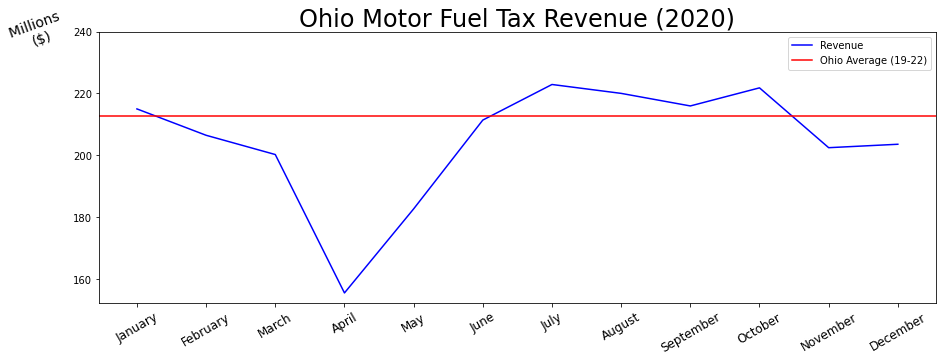

In [27]:
# Plot 20
fig,ax = plt.subplots(figsize=(15,5))

ax.plot(ohio_df_chron['id'].loc[ohio_df_chron['year']==2020],ohio_df_chron['value'].loc[ohio_df_chron['year']==2020]/1000000, color='b')

ax.set_title('Ohio Motor Fuel Tax Revenue (2020)', fontsize=24)
ax.set_xticks(np.arange(0,12,step=1), labels=ohio_df_chron['month'].loc[ohio_df_chron['year']==2020], rotation=30, fontsize=12)
ax.set_yticks(ticks=np.arange(160,260,step=20),fontsize=12)
ax.set_ylabel('Millions \n($)', rotation=20, fontsize=14)
ax.yaxis.set_label_coords(-0.065,.95)

# Set total oh_average line
ax.axhline(y=oh_mean/1000000, color='r')
ax.legend(['Revenue','Ohio Average (19-22)'])

# Can't save fig here or it will ruin all 50 states
# plt.savefig('Individual_State_Revenues/Ohio/Ohio_Revenue_2020')

fig.show()

C:\Users\Ian\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


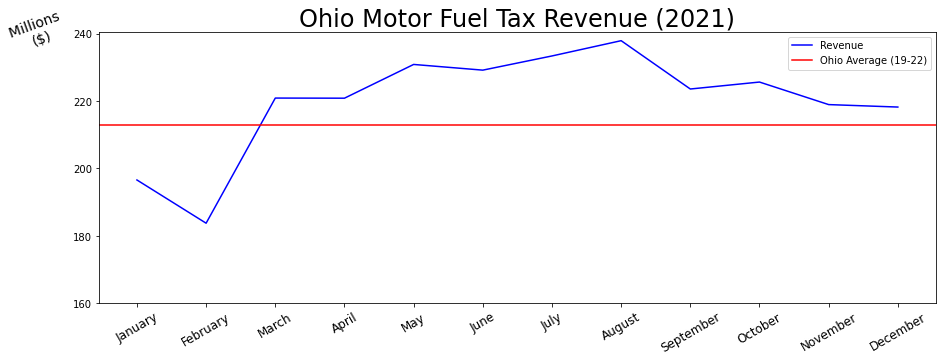

In [28]:
# Plot 21
fig,ax = plt.subplots(figsize=(15,5))

ax.plot(ohio_df_chron['id'].loc[ohio_df_chron['year']==2021],ohio_df_chron['value'].loc[ohio_df_chron['year']==2021]/1000000, color='b')

ax.set_title('Ohio Motor Fuel Tax Revenue (2021)', fontsize=24)
ax.set_xticks(np.arange(0,12,step=1), labels=ohio_df_chron['month'].loc[ohio_df_chron['year']==2021], rotation=30, fontsize=12)
ax.set_yticks(ticks=np.arange(160,260,step=20),fontsize=12)
ax.set_ylabel('Millions \n($)', rotation=20, fontsize=14)
ax.yaxis.set_label_coords(-0.065,.95)

# Set total oh_average line
ax.axhline(y=oh_mean/1000000, color='r')
ax.legend(['Revenue','Ohio Average (19-22)'])

# Can't save fig here or it will ruin all 50 states
# plt.savefig('Individual_State_Revenues/Ohio/Ohio_Revenue_2021')

fig.show()

C:\Users\Ian\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


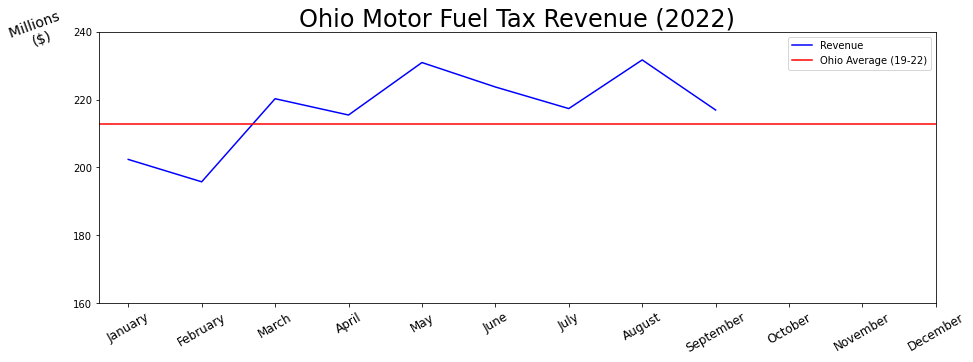

In [29]:
# Plot 22
fig,ax = plt.subplots(figsize=(15,5))

ax.plot(ohio_df_chron['id'].loc[ohio_df_chron['year']==2022],ohio_df_chron['value'].loc[ohio_df_chron['year']==2022]/1000000, color='b')

ax.set_title('Ohio Motor Fuel Tax Revenue (2022)', fontsize=24)
# Need to set labels using a different year, since 2022 is missing 3 months of data
ax.set_xticks(np.arange(0,12,step=1), labels=ohio_df_chron['month'].loc[ohio_df_chron['year']==2020], rotation=30, fontsize=12)
ax.set_yticks(ticks=np.arange(160,260,step=20),fontsize=12)
ax.set_ylabel('Millions \n($)', rotation=20, fontsize=14)
ax.yaxis.set_label_coords(-0.065,.95)

ax.axhline(y=oh_mean/1000000, color='r')
ax.legend(['Revenue','Ohio Average (19-22)'])

# Can't save fig here or it will ruin all 50 states
# plt.savefig('Individual_State_Revenues/Ohio/Ohio_Revenue_2022')

fig.show()

C:\Users\Ian\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:20: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


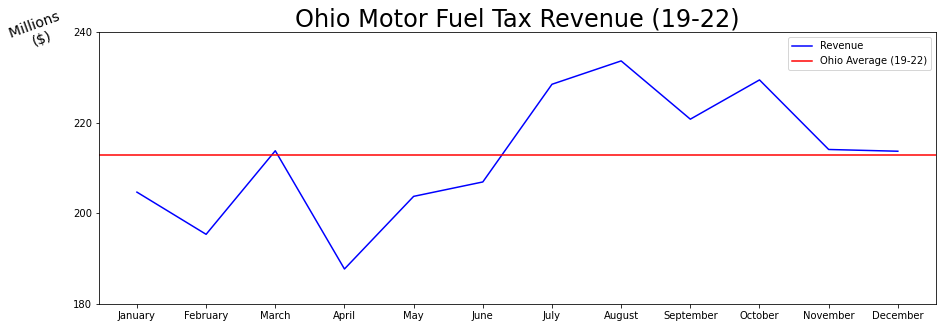

In [30]:
# Plot averages
# Create a basic plot to visualize the month trends
fig,ax = plt.subplots(figsize=(15,5))

ax.plot(oh_avg_df['Months'],oh_avg_df['Average Tax Per Month']/1000000, color='b')

ax.set_title('Ohio Motor Fuel Tax Revenue (19-22)', fontsize=24)
ax.set_xticks(np.arange(0,12,step=1), rotation=60, fontsize=12)
ax.set_yticks(ticks=np.arange(180,260,step=20),fontsize=12)
ax.set_ylabel('Millions \n($)', rotation=20, fontsize=14)
ax.yaxis.set_label_coords(-0.065,.95)

# Set total oh_average line
ax.axhline(y=oh_mean/1000000, color='r')
ax.legend(['Revenue','Ohio Average (19-22)'])

# Can't save fig here or it will ruin all 50 states
# plt.savefig('Individual_State_Revenues/Ohio/Ohio_Revenue_Averages')

fig.show()

# Automate the process of creating a dataframe for each state

In [31]:
# Create a list with each of the 50 states, not including the many duplicates
states_list = []

for state in nat_df['state']:
    if state not in states_list:
        states_list.append(state)

states_list.sort()
states_list[:5]

['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California']

In [32]:
# For state in the list, create a dataframe for that state, and create a folder (if doesn't exist already) to contain its eventual graphs
df={}
base_dir = 'C:/Users/Ian/Desktop/Misc_Projects/Sales_Tax_Analysis/Individual_State_Revenues/'
for state in states_list:
    df[state] = nat_df.loc[nat_df['state']==state]
    try:
        path = base_dir+state
        os.mkdir(path)
    except:
        print(f'Error Creating New Folder for {state}')

try:
    # Also create a directory for national graphs
    os.mkdir(base_dir+'/Natl')
except:
    print(f'Error Creating New Folder for National')

Error Creating New Folder for Alabama
Error Creating New Folder for Alaska
Error Creating New Folder for Arizona
Error Creating New Folder for Arkansas
Error Creating New Folder for California
Error Creating New Folder for Colorado
Error Creating New Folder for Connecticut
Error Creating New Folder for Delaware
Error Creating New Folder for Florida
Error Creating New Folder for Georgia
Error Creating New Folder for Hawaii
Error Creating New Folder for Idaho
Error Creating New Folder for Illinois
Error Creating New Folder for Indiana
Error Creating New Folder for Iowa
Error Creating New Folder for Kentucky
Error Creating New Folder for Louisiana
Error Creating New Folder for Maine
Error Creating New Folder for Maryland
Error Creating New Folder for Massachusetts
Error Creating New Folder for Michigan
Error Creating New Folder for Minnesota
Error Creating New Folder for Mississippi
Error Creating New Folder for Missouri
Error Creating New Folder for Nebraska
Error Creating New Folder for

In [33]:
df['Michigan'].head()

,state,month,year,value,fips state,numeric month,id
23,Michigan,October,2022,106353559.00,26,10,26_2022_10
865,Michigan,April,2019,120853742.00,26,4,26_2019_4
866,Michigan,April,2020,103677245.00,26,4,26_2020_4
867,Michigan,April,2021,130834656.00,26,4,26_2021_4
868,Michigan,April,2022,120819302.00,26,4,26_2022_4


## Create graphs comparing each state to the national average

In [34]:
# Find the mean for each state
state_means = {}

for state in states_list:
    state_means[state] = df[state]['value'].mean()
    
list(state_means.items())[:5]

[('Alabama', 69757765.72093023),
 ('Alaska', 3911542.4523809524),
 ('Arizona', 63631458.697674416),
 ('Arkansas', 45362162.79069767),
 ('California', 671384953.4883721)]

In [35]:
state_avg_diff = state_means.copy()

for mean in state_avg_diff:
    state_avg_diff[mean] -= nat_mean

print(list(state_avg_diff.items())[:5])

print(list(state_means.items())[:5])

[('Alabama', -26360868.865451306), ('Alaska', -92207092.13400058), ('Arizona', -32487175.888707124), ('Arkansas', -50756471.79568387), ('California', 575266318.9019905)]
[('Alabama', 69757765.72093023), ('Alaska', 3911542.4523809524), ('Arizona', 63631458.697674416), ('Arkansas', 45362162.79069767), ('California', 671384953.4883721)]


In [36]:
nat_avg_df = pd.DataFrame()

for state in states_list:
    d[state]={'State':state,
              'Avg Tax':state_means[state],
              'Diff from Natl Avg':state_avg_diff[state]}    
    nat_avg_df = nat_avg_df.append(d[state], ignore_index=True)
    
nat_avg_df.head()

,State,Avg Tax,Diff from Natl Avg
0,Alabama,69757765.72,-26360868.87
1,Alaska,3911542.45,-92207092.13
2,Arizona,63631458.70,-32487175.89
3,Arkansas,45362162.79,-50756471.80
4,California,671384953.49,575266318.90


C:\Users\Ian\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:30: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


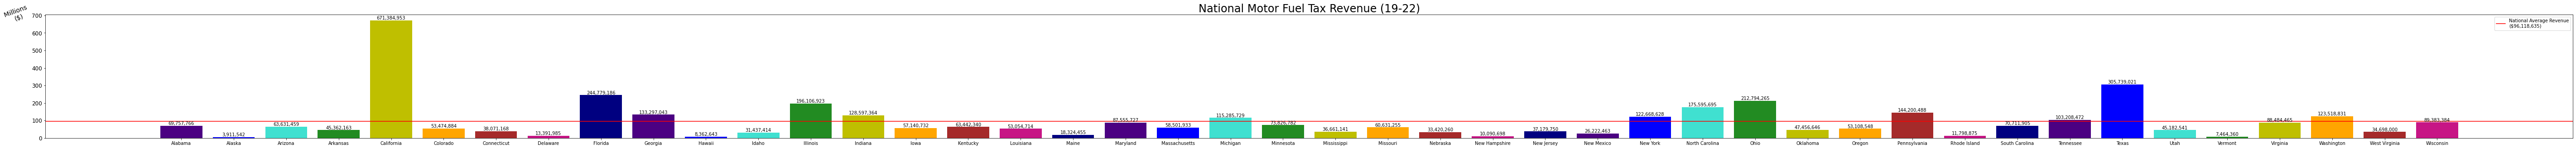

In [37]:
fig, ax = plt.subplots(figsize=(100,5))


ax.bar(nat_avg_df['State'],nat_avg_df['Avg Tax'],
      color=['indigo','b','turquoise','forestgreen','y','orange','brown','mediumvioletred','navy'])

ax.set_title('National Motor Fuel Tax Revenue (19-22)', fontsize=24)
ax.set_xticks(np.arange(0,44,step=1), rotation=60, fontsize=12)
ax.set_yticks(ticks=np.arange(0,710000000,step=100000000),labels=np.arange(0,710, step=100),fontsize=12)
ax.set_ylabel('Millions \n($)', rotation=20, fontsize=14)
ax.yaxis.set_label_coords(-0.01,.95)

# Labels above each bar
rects = ax.patches
labels = []
for value in nat_avg_df['Avg Tax']:
    value = round(value)
    labels.append(f'{value:,}')

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom")

# Set total oh_average line
ax.axhline(y=nat_mean, color='r')
ax.legend([f'National Average Revenue\n(${round(nat_mean):,})'])

plt.savefig('Individual_State_Revenues/Natl/Natl_Revenue_Averages')

fig.show()

C:\Users\Ian\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:33: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


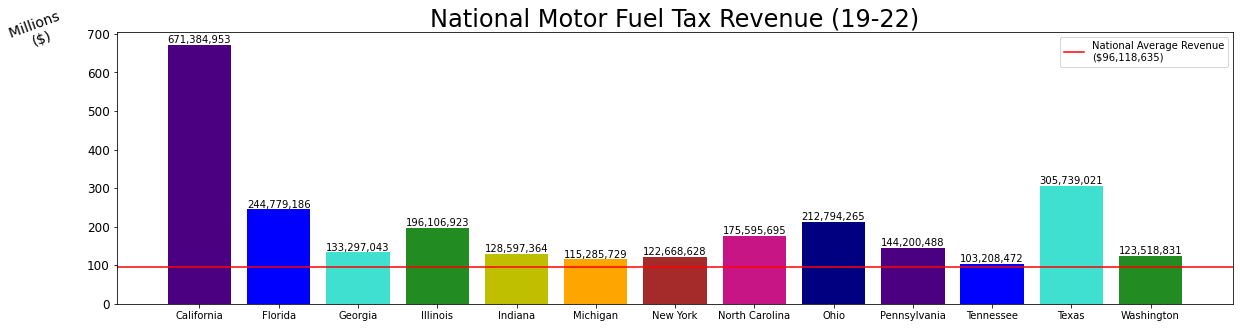

In [38]:
fig, ax = plt.subplots(figsize=(20,5))


ax.bar(nat_avg_df['State'].loc[nat_avg_df['Diff from Natl Avg']>=0],
       nat_avg_df['Avg Tax'].loc[nat_avg_df['Diff from Natl Avg']>=0],
      color=['indigo','b','turquoise','forestgreen','y','orange','brown','mediumvioletred','navy'])

ax.set_title('National Motor Fuel Tax Revenue (19-22)', fontsize=24)
ax.set_xticks(np.arange(0,13,step=1), rotation=60, fontsize=12)
ax.set_yticks(ticks=np.arange(0,710000000,step=100000000),labels=np.arange(0,710, step=100),fontsize=12)
ax.set_ylabel('Millions \n($)', rotation=20, fontsize=14)
ax.yaxis.set_label_coords(-0.065,.95)

# Set total oh_average line
ax.axhline(y=nat_mean, color='r')
ax.legend([f'National Average Revenue\n(${round(nat_mean):,})'])


rects = ax.patches
labels = []
for value in nat_avg_df['Avg Tax'].loc[nat_avg_df['Diff from Natl Avg']>=0]:
    value = round(value)
    labels.append(f'{value:,}')

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom")


# Can't save fig here or it will ruin all 50 states
plt.savefig('Individual_State_Revenues/Natl/Natl_Revenue_Averages_(High)')

fig.show()

## Create revenue graphs for each state (Total and Each Year)

In [39]:
# Sort every filtered dataframe chronologically
chron_df = {}

for state in states_list:
    chron_df[state] = df[state].sort_values(['year','numeric month'])
   
chron_df['Michigan'].head()

,state,month,year,value,fips state,numeric month,id
865,Michigan,April,2019,120853742.00,26,4,26_2019_4
890,Michigan,May,2019,114353386.00,26,5,26_2019_5
884,Michigan,June,2019,126825609.00,26,6,26_2019_6
881,Michigan,July,2019,128877968.00,26,7,26_2019_7
869,Michigan,August,2019,126804536.00,26,8,26_2019_8


In [40]:
# Remove the fips value from the 'id' column to make nice labels for eventual graphs
for state in states_list:
    fips = chron_df[state]['fips state']

    chron_df[state]['id'] = chron_df[state]['id'].map(lambda x: x.lstrip(f"{fips}"))
    # Remove underscore separately, because f'{fips}_' removes the entire id value
    chron_df[state]['id'] = chron_df[state]['id'].map(lambda x: x.lstrip('_'))

In [41]:
# Verify fips was removed from 'id' column
chron_df['Michigan'].head()

,state,month,year,value,fips state,numeric month,id
865,Michigan,April,2019,120853742.00,26,4,2019_4
890,Michigan,May,2019,114353386.00,26,5,2019_5
884,Michigan,June,2019,126825609.00,26,6,2019_6
881,Michigan,July,2019,128877968.00,26,7,2019_7
869,Michigan,August,2019,126804536.00,26,8,2019_8


In [42]:
# Reset index for each dataframe and remove redundant columns (state is still saved in states_list so not needed in df)
for state in states_list:
    chron_df[state].reset_index(inplace=True)
    chron_df[state].drop(labels=['index','fips state', 'state'],axis=1,inplace=True)
    
chron_df['Michigan'].head()

,month,year,value,numeric month,id
0,April,2019,120853742.00,4,2019_4
1,May,2019,114353386.00,5,2019_5
2,June,2019,126825609.00,6,2019_6
3,July,2019,128877968.00,7,2019_7
4,August,2019,126804536.00,8,2019_8


Alabama min: 50579293.0
Alabama max: 83768890.0
Alaska min: 2706976.0
Alaska max: 6275608.0


C:\Users\Ian\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:26: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
C:\Users\Ian\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:26: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
C:\Users\Ian\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:26: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


Arizona min: 42603815.0
Arizona max: 72720236.0
Arkansas min: 37350997.0
Arkansas max: 53931080.0
California min: 427800000.0
California max: 796672000.0


C:\Users\Ian\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:26: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
C:\Users\Ian\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:26: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
C:\Users\Ian\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:26: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


Colorado min: 29885000.0
Colorado max: 73955000.0
Connecticut min: 9463538.0
Connecticut max: 46428055.0


C:\Users\Ian\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:26: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
C:\Users\Ian\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:26: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
C:\Users\Ian\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:26: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


Delaware min: 8376805.0
Delaware max: 19722481.0
Florida min: 156950539.0
Florida max: 286028441.0
Georgia min: -6419000.0
Georgia max: 238227000.0


C:\Users\Ian\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:26: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
C:\Users\Ian\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:26: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


Hawaii min: 2779296.0
Hawaii max: 17147309.0
Idaho min: 21692301.0
Idaho max: 46153235.0


C:\Users\Ian\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:26: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
C:\Users\Ian\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:26: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


Illinois min: 112395636.0
Illinois max: 227160111.0
Indiana min: 95218257.0
Indiana max: 162648399.0


C:\Users\Ian\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:26: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
C:\Users\Ian\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:26: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
C:\Users\Ian\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:26: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


Iowa min: 45014198.0
Iowa max: 73375774.0
Kentucky min: 45468619.0
Kentucky max: 73552918.0
Louisiana min: 31502425.0
Louisiana max: 59002560.0


C:\Users\Ian\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:26: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
C:\Users\Ian\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:26: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


Maine min: 12194945.0
Maine max: 25804412.0
Maryland min: 44948683.0
Maryland max: 123636237.0


C:\Users\Ian\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:26: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
C:\Users\Ian\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:26: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
C:\Users\Ian\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
C:\Users\Ian\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:26: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, s

Massachusetts min: 34702719.0
Massachusetts max: 68758878.0
Michigan min: 64772662.0
Michigan max: 141308290.0
Minnesota min: 48805477.0
Minnesota max: 84443177.0


C:\Users\Ian\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:26: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
C:\Users\Ian\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:26: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


Mississippi min: 23644100.0
Mississippi max: 41511128.0
Missouri min: 44172444.0
Missouri max: 84287223.0


C:\Users\Ian\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:26: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
C:\Users\Ian\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:26: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


Nebraska min: 25248156.0
Nebraska max: 39913188.0
New Hampshire min: 6800000.0
New Hampshire max: 11900000.0


C:\Users\Ian\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:26: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
C:\Users\Ian\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:26: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


New Jersey min: 15185000.0
New Jersey max: 47903000.0
New Mexico min: 20198626.0
New Mexico max: 29512901.0


C:\Users\Ian\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:26: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
C:\Users\Ian\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:26: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


New York min: 61087000.0
New York max: 154881000.0
North Carolina min: 96494538.0
North Carolina max: 245112353.0


C:\Users\Ian\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:26: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
C:\Users\Ian\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:26: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
C:\Users\Ian\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:26: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


Ohio min: 155490571.0
Ohio max: 244895720.0
Oklahoma min: 36342993.0
Oklahoma max: 61096398.0
Oregon min: 36257370.0
Oregon max: 70397863.0


C:\Users\Ian\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:26: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
C:\Users\Ian\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:26: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


Pennsylvania min: 103210000.0
Pennsylvania max: 189348000.0
Rhode Island min: 11798875.0
Rhode Island max: 11798875.0


C:\Users\Ian\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:26: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
C:\Users\Ian\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:26: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


South Carolina min: 26300000.0
South Carolina max: 115700000.0
Tennessee min: 69784632.0
Tennessee max: 130152067.0


C:\Users\Ian\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:26: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
C:\Users\Ian\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:26: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
C:\Users\Ian\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:26: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


Texas min: 221366000.0
Texas max: 335001000.0
Utah min: 29323754.0
Utah max: 72413196.0
Vermont min: 3380000.0
Vermont max: 9868861.0


C:\Users\Ian\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:26: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
C:\Users\Ian\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:26: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
C:\Users\Ian\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:26: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


Virginia min: 49367000.0
Virginia max: 126438000.0
Washington min: 70231877.0
Washington max: 170586146.0
West Virginia min: 20342000.0
West Virginia max: 51395000.0
Wisconsin min: 52307087.0
Wisconsin max: 128824463.0


C:\Users\Ian\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:26: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
C:\Users\Ian\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:26: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


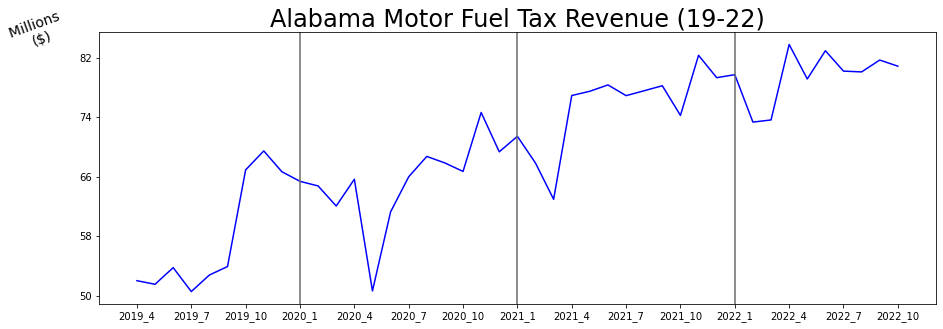

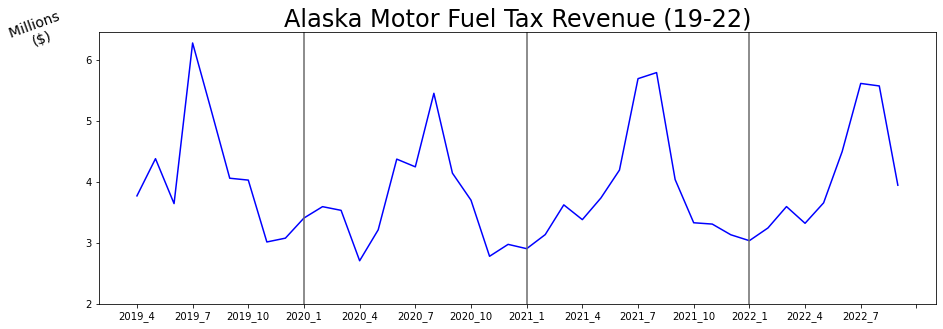

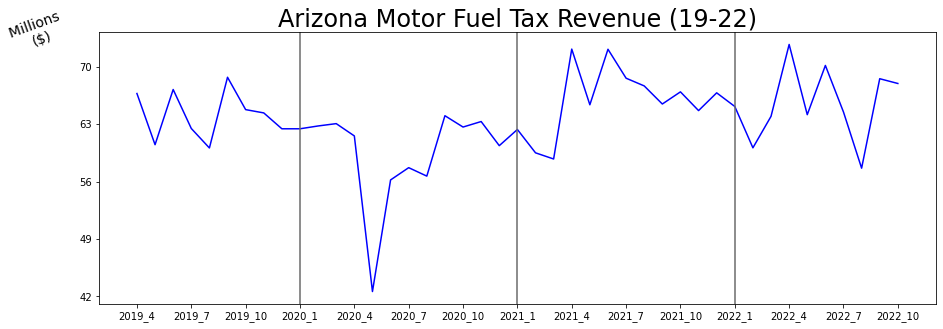

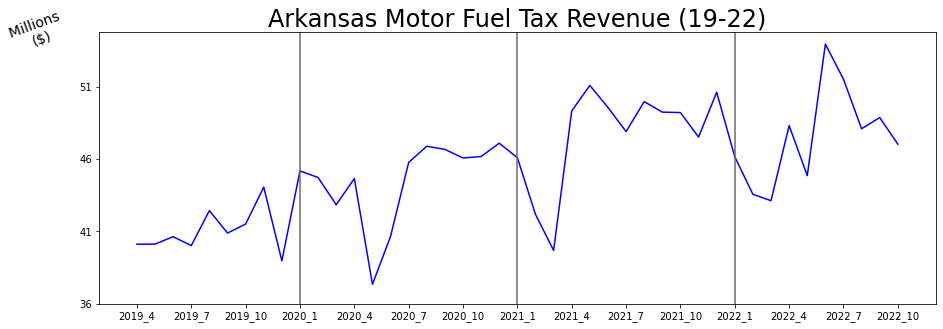

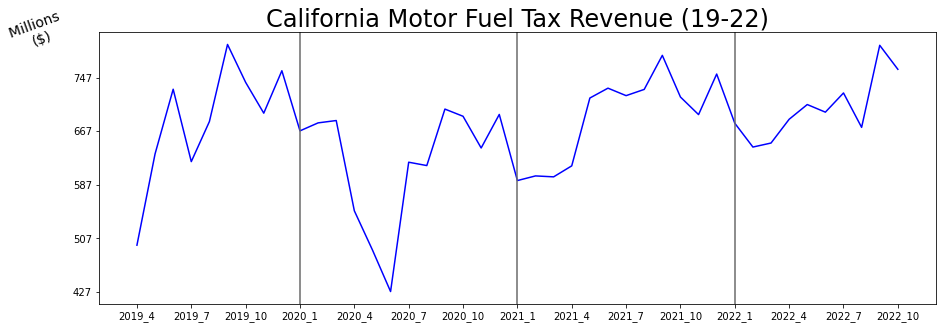

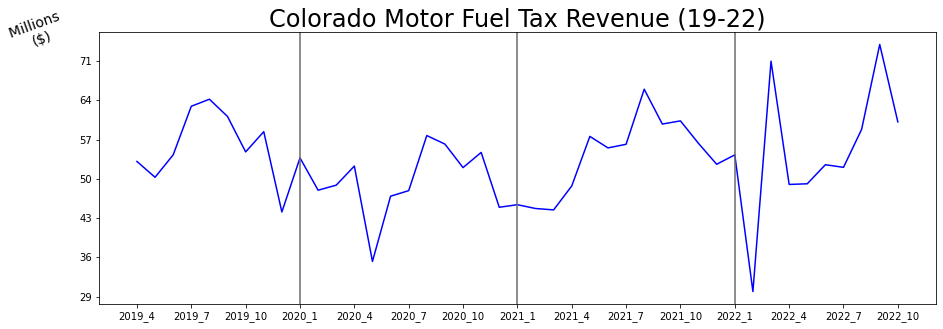

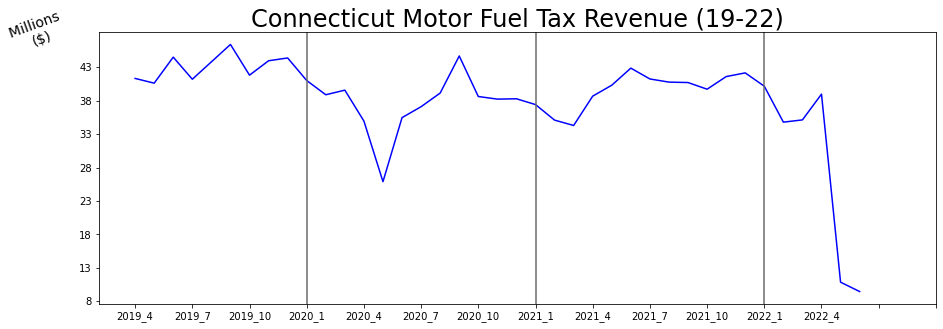

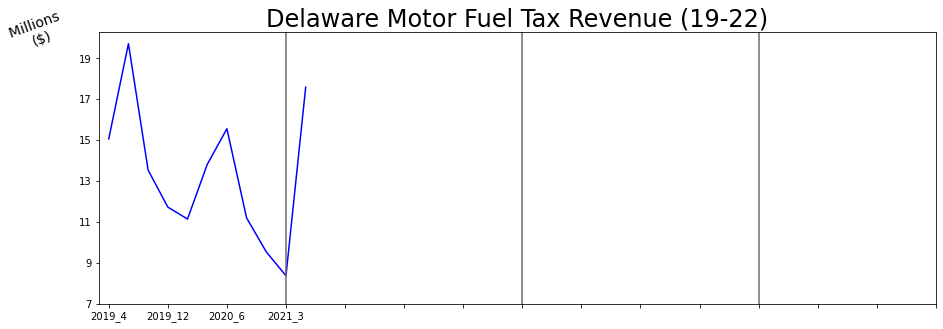

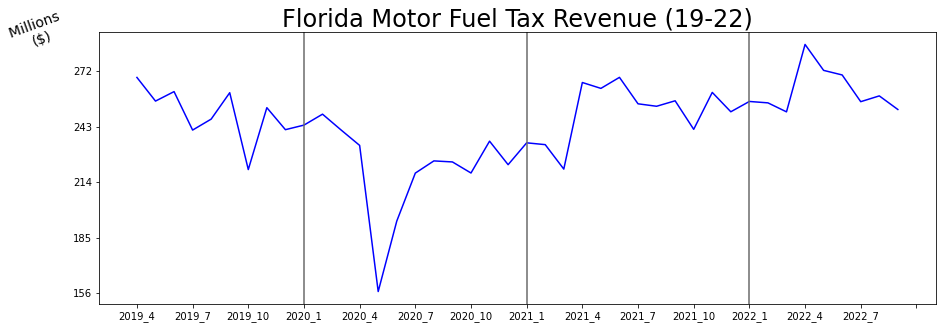

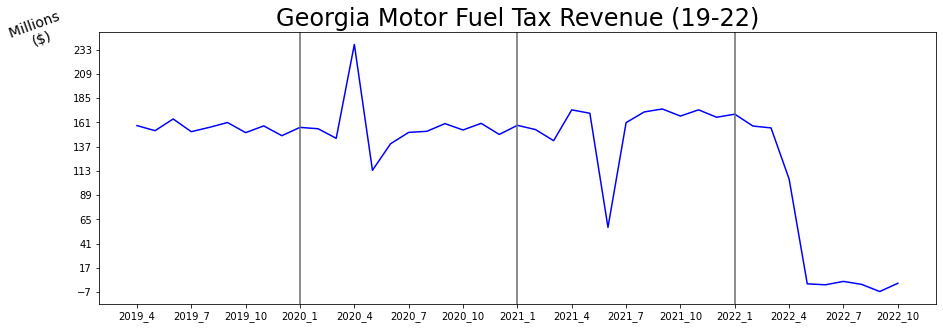

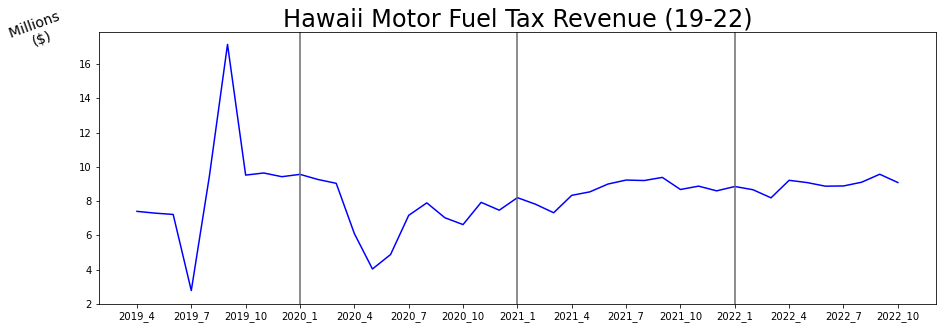

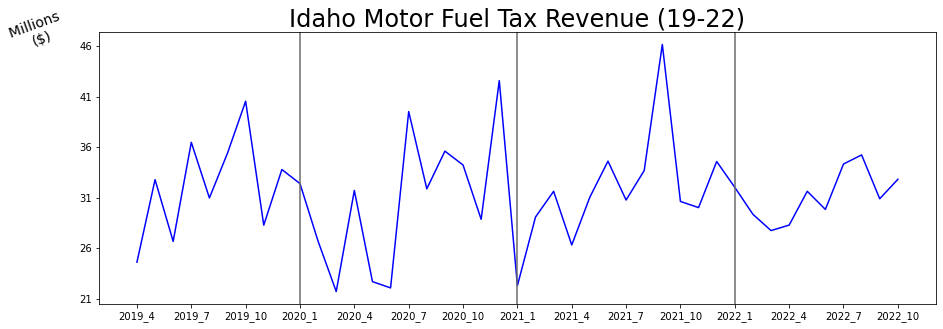

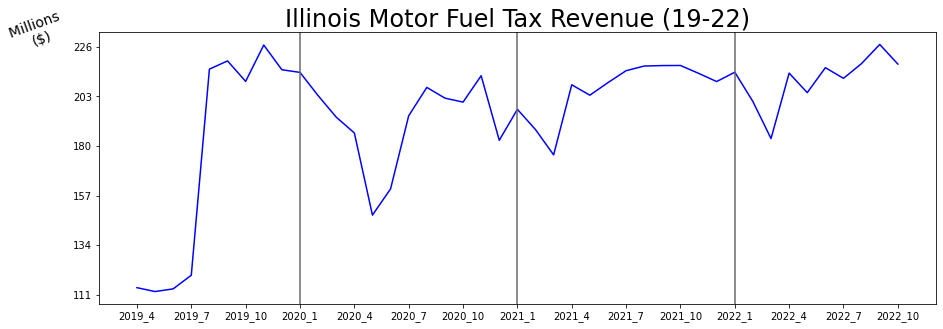

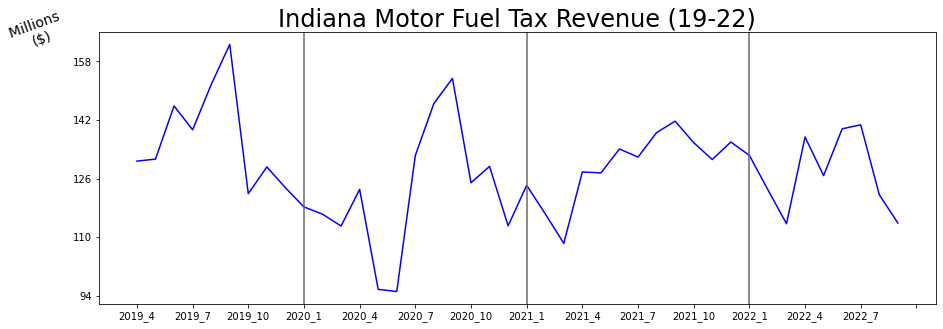

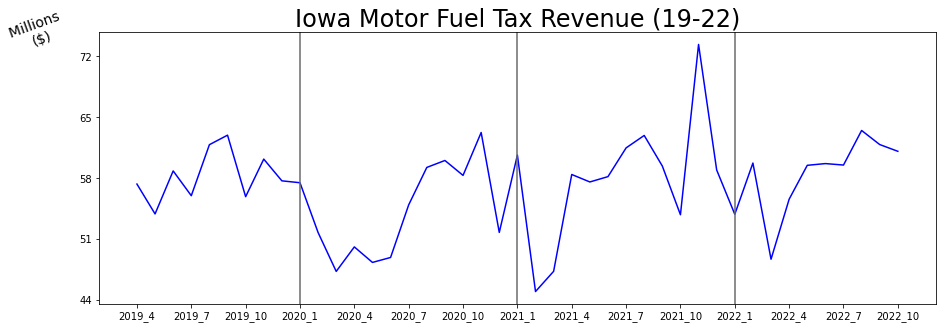

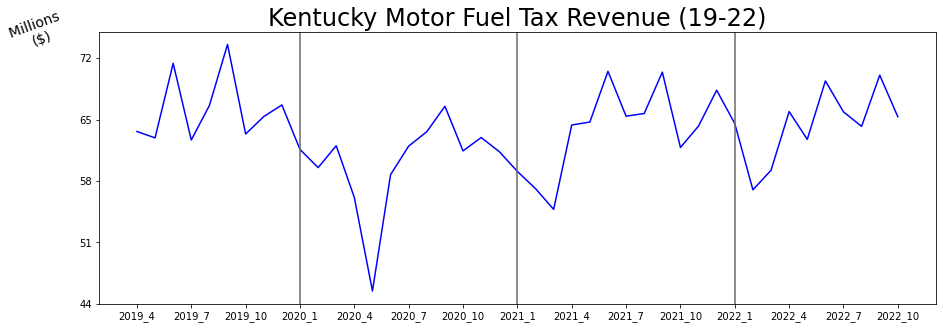

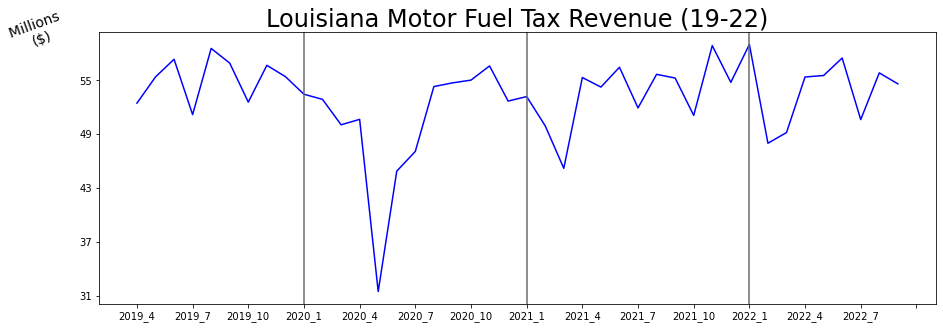

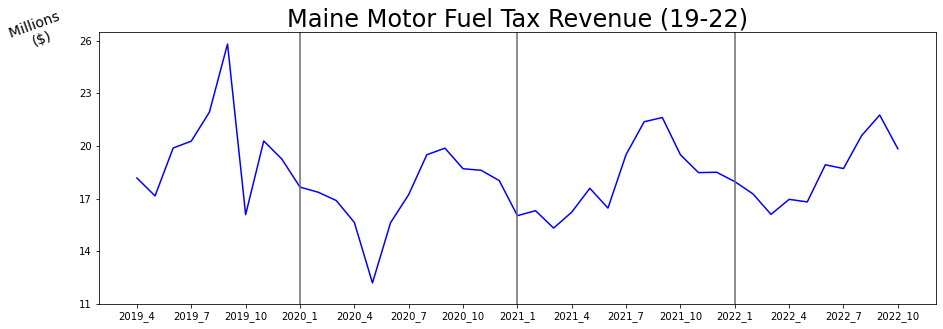

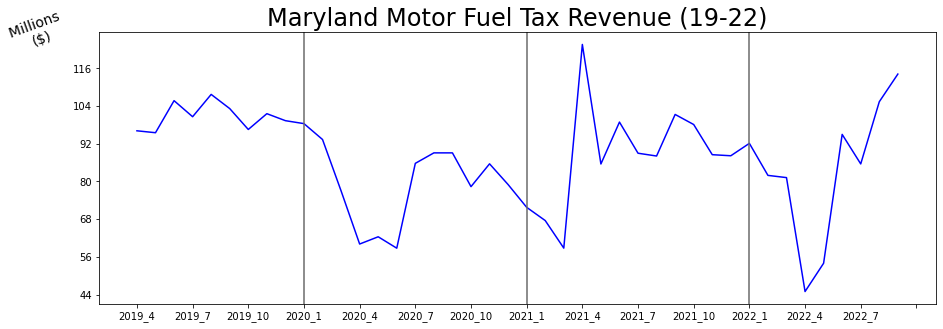

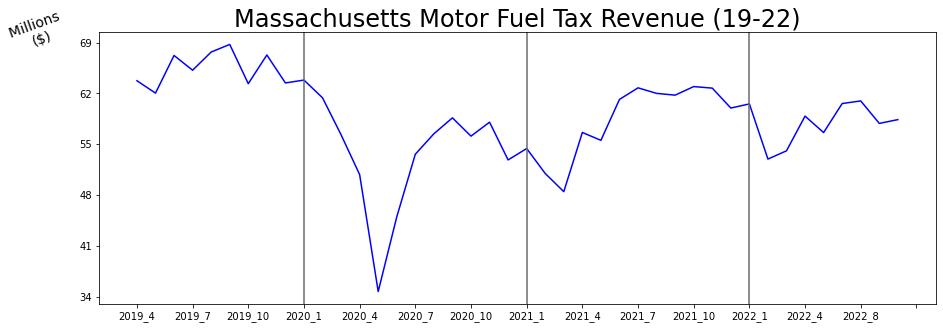

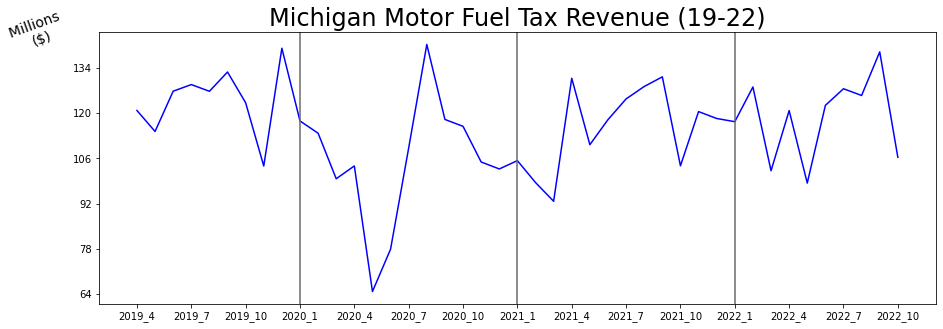

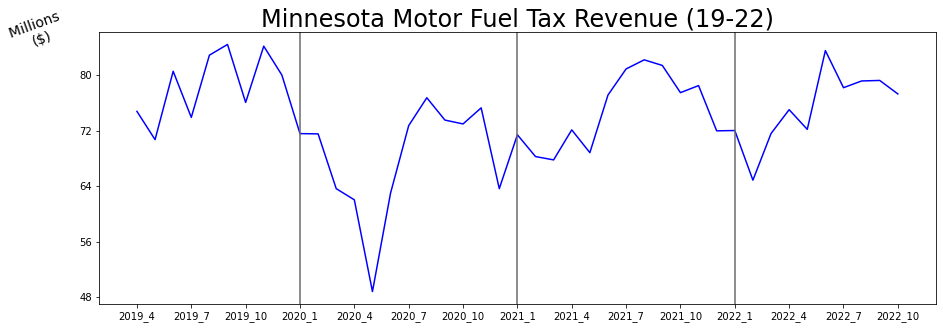

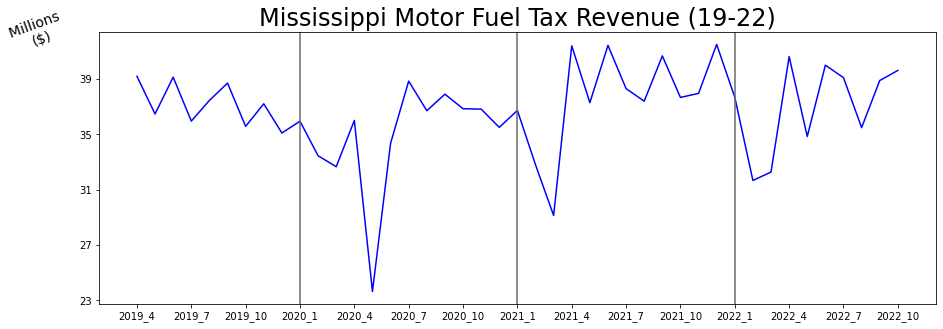

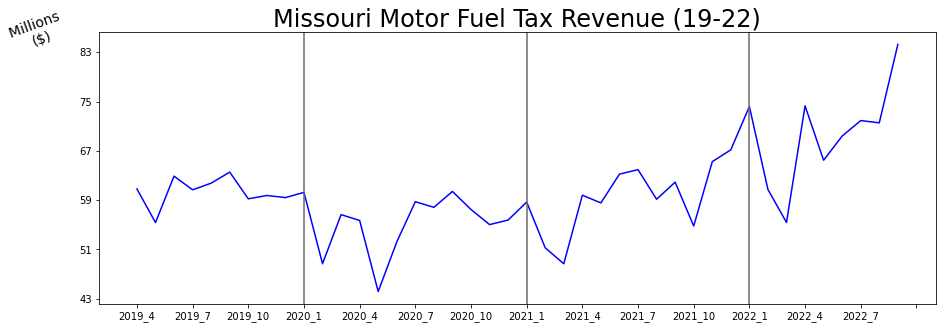

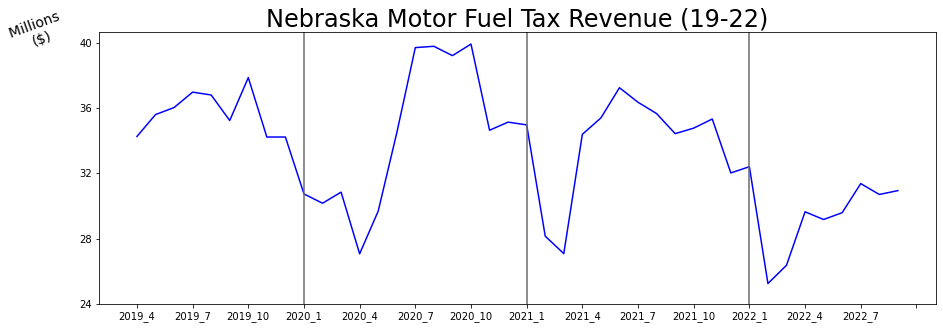

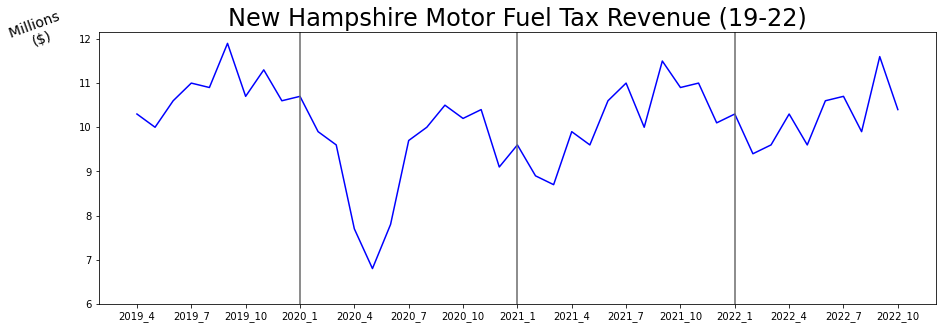

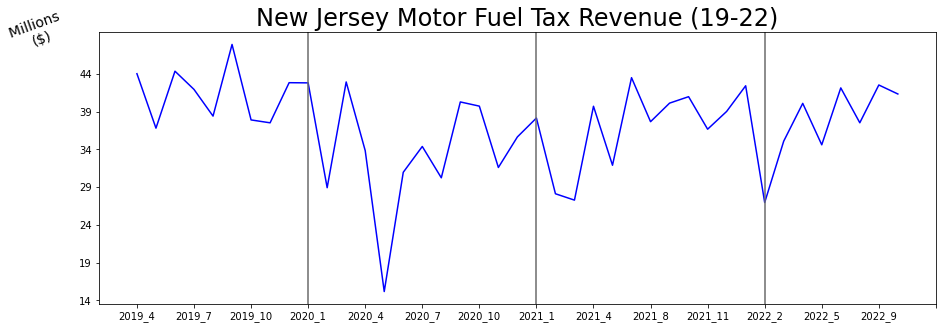

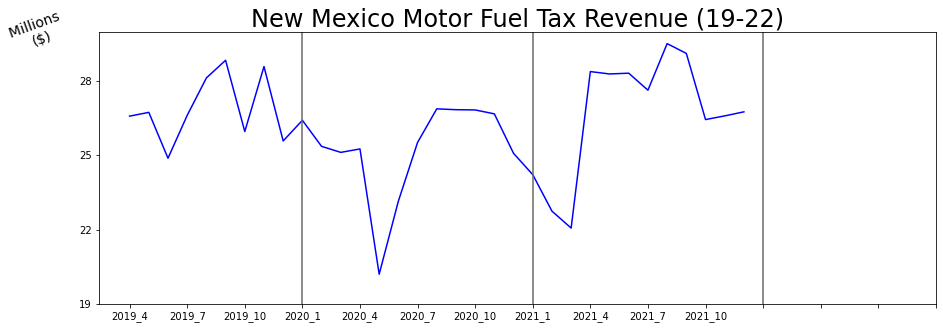

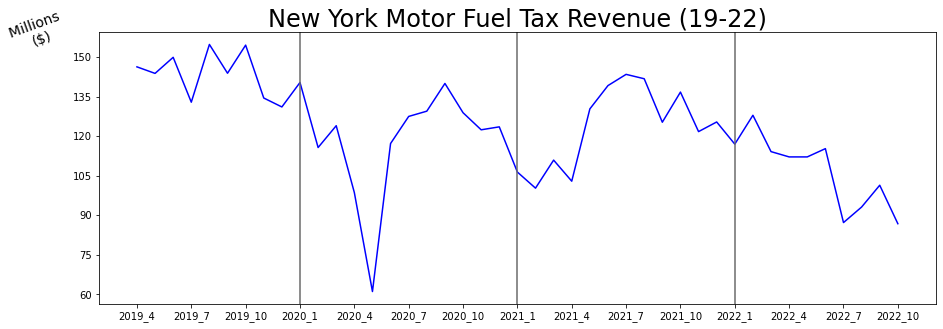

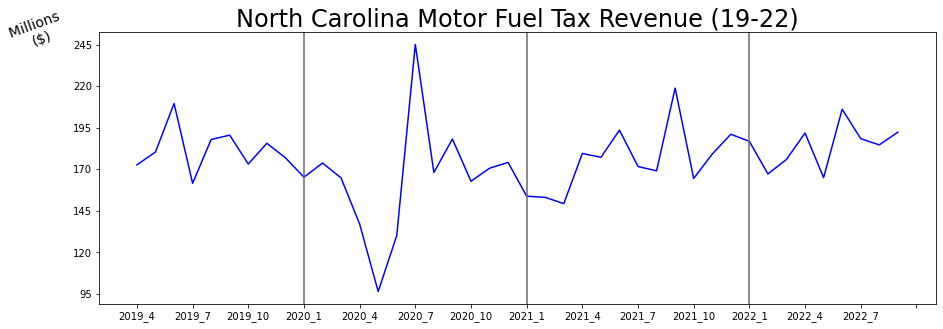

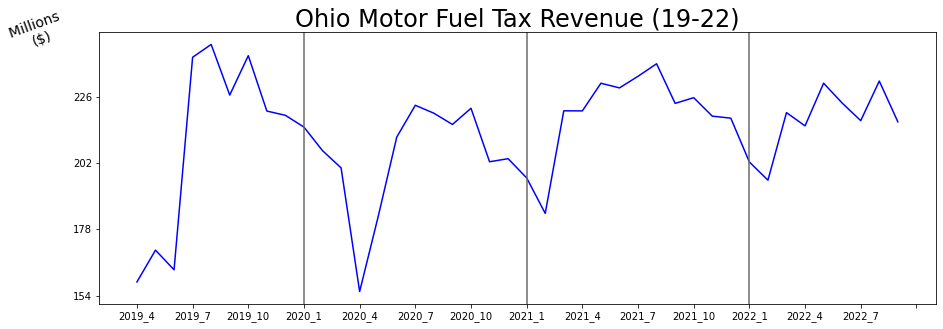

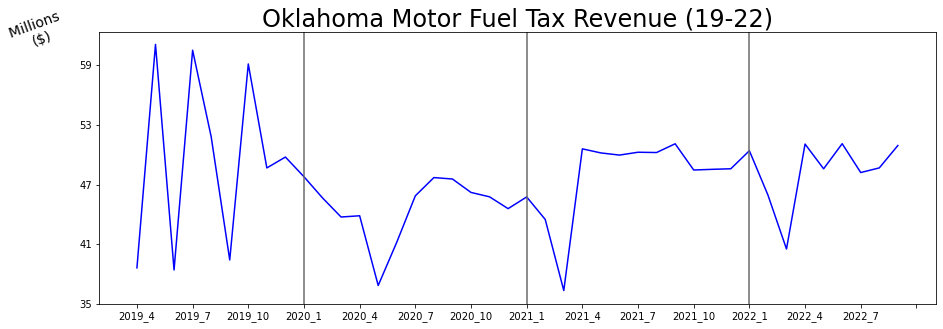

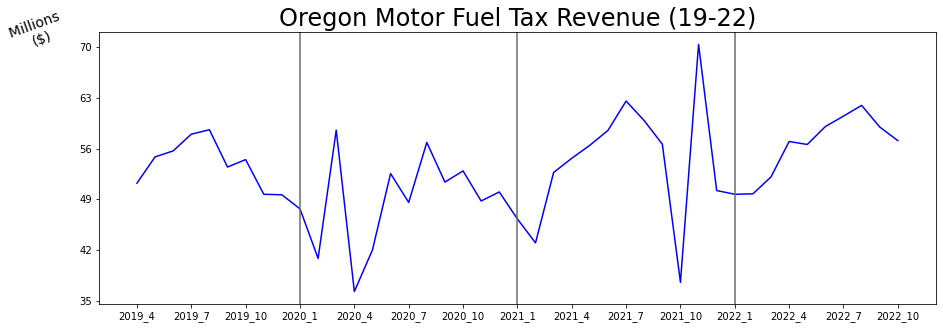

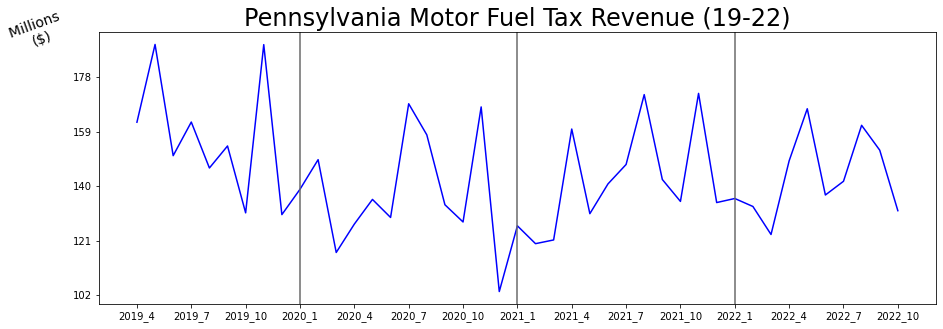

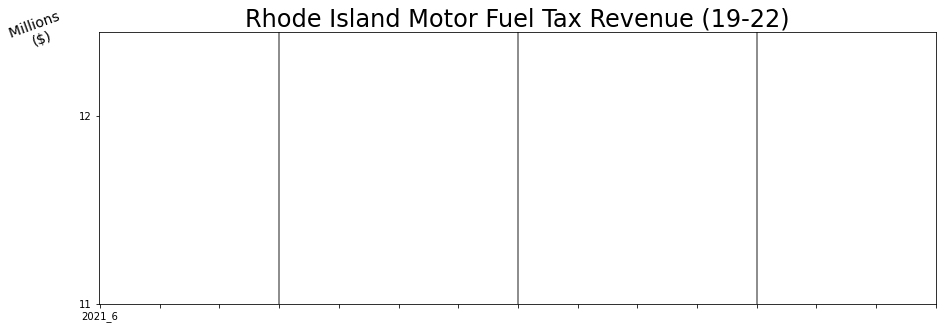

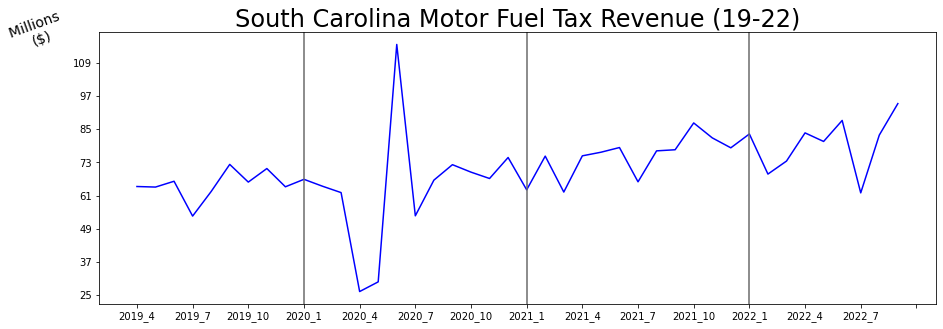

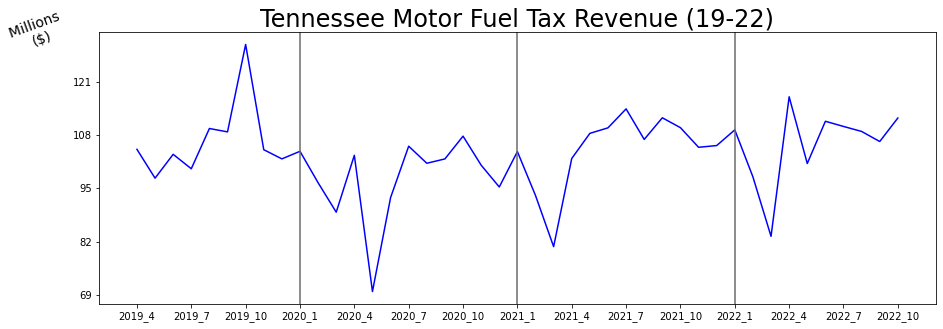

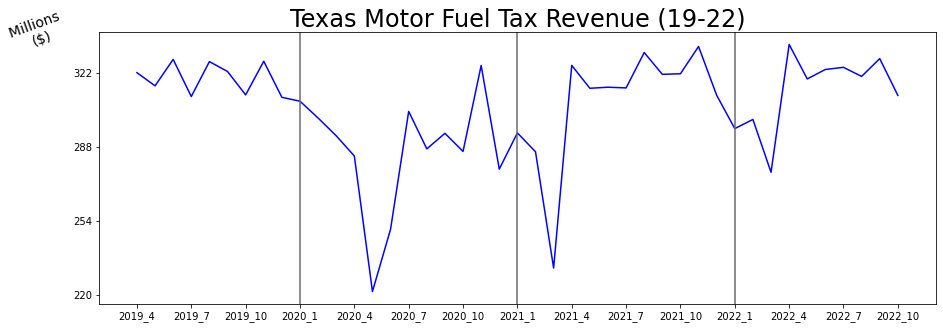

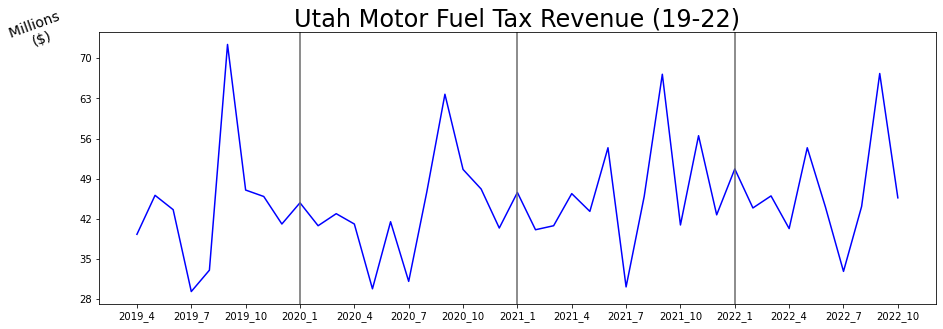

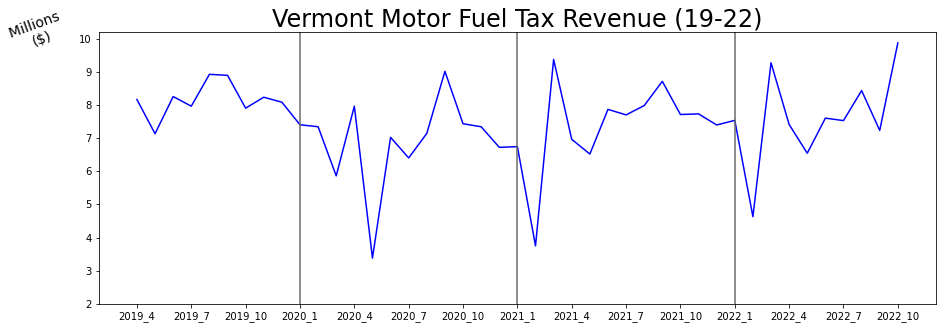

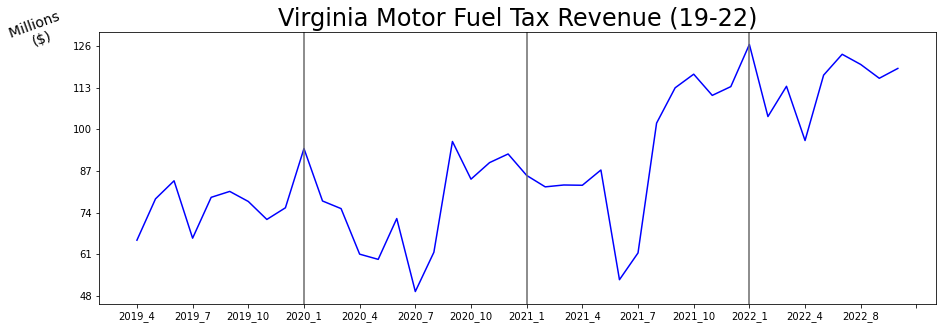

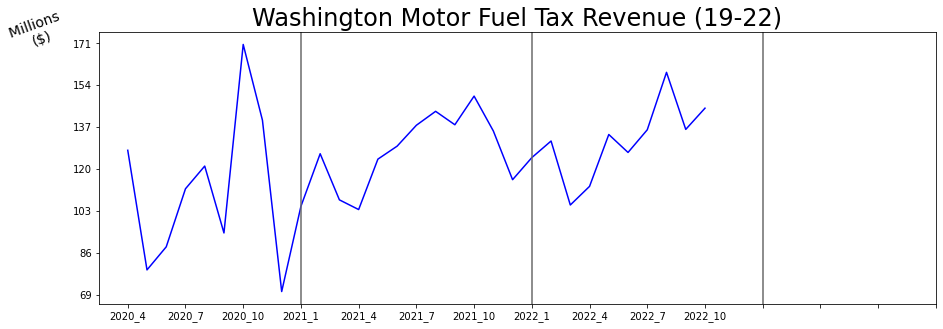

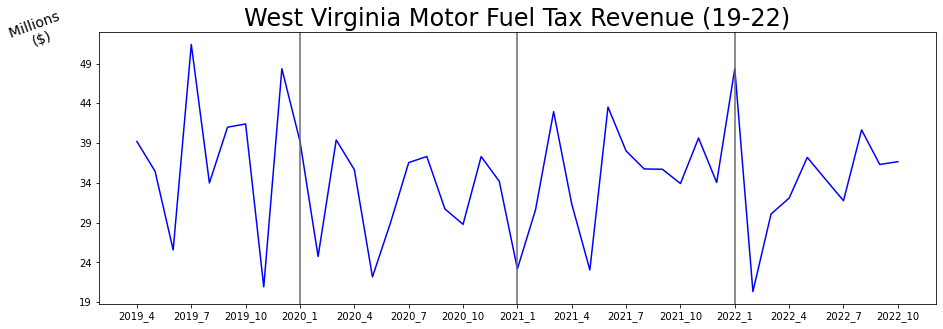

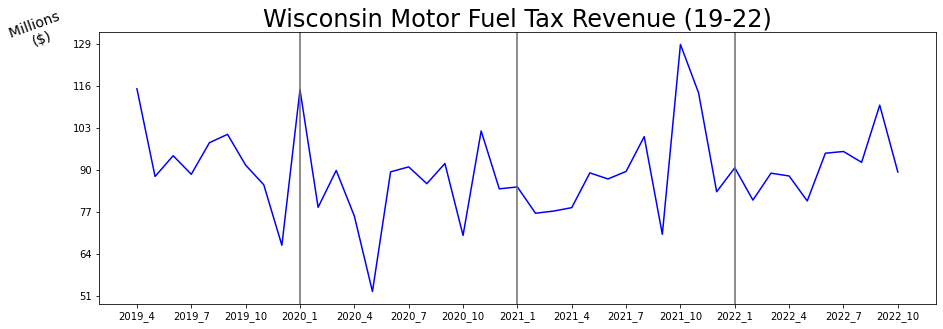

In [51]:
# Create a basic plot to visualize the month trends

for state in states_list:
    ymin = min(chron_df[state]['value'])
    ymax = max(chron_df[state]['value'])
    print(f'{state} min: {ymin}')
    print(f'{state} max: {ymax}')
    fig,ax = plt.subplots(figsize=(15,5))

    ax.plot(chron_df[state]['id'],chron_df[state]['value']/1000000, color='b')

    ax.set_title(f'{state} Motor Fuel Tax Revenue (19-22)', fontsize=24)
    ax.set_xticks(np.arange(0,45,step=3), rotation=30, fontsize=12)
    ax.set_yticks(ticks=np.arange(round(ymin/1000000)-1,round(ymax/1000000)+1,step=round(ymax/10000000)),fontsize=12)
    ax.set_ylabel('Millions \n($)', rotation=20, fontsize=14)
    ax.yaxis.set_label_coords(-0.065,.95)

    # # Create vert lines to show separate years
    ax.axvline(x=9, color='dimgray')
    ax.axvline(x=21, color='dimgray')
    ax.axvline(x=33, color='dimgray')

    # Can't save fig here or it will ruin all 50 states
    plt.savefig(f'Individual_State_Revenues/{state}/{state}_Revenue_Total')

    fig.show()